# Convection PDE

In [128]:
import numpy
import matplotlib.pyplot as pyplot

## Linear Advection (or linear convection, or one-way wave equation)

$$\frac{\partial u}{\partial t}+c \frac{\partial u}{\partial x}=0$$

Shorter notation: $u_t +c \cdot u_x = 0$

Using forward scheme for time derivative (Euler) and backward scheme for spatial derivative

$$\frac{u_{i}^{n+1}-u_{i}^{n}}{\Delta t}+c \frac{u_{i}^{n}-u_{i-1}^{n}}{\Delta x}=0$$

Time extrapolation:

$$u_{i}^{n+1}=u_{i}^{n}-\frac{c \Delta t}{\Delta x} (u_{i}^{n}-u_{i-1}^{n})$$

Forward-time/backward-space.

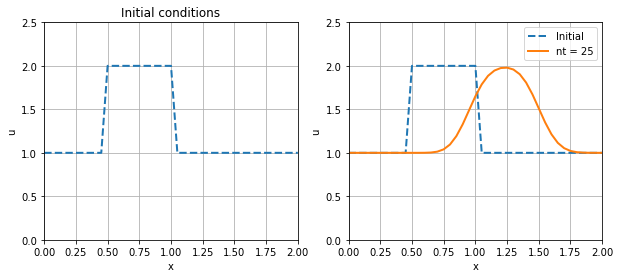

In [87]:
# Set parameters.
nx = 41  # number of spatial discrete points, initial is 41. try changing it and see the response
L = 2.0  # length of the 1D domain
dx = L / (nx - 1)  # spatial grid size
nt = 25  # number of time steps
dt = 0.02  # time-step size
c = 1.0  # convection speed

# Define the grid point coordinates.
x = numpy.linspace(0.0, L, num=nx)

# Set initial conditions with 1.0 everywhere (for now).
u0 = numpy.ones(nx)

# Get a list of indices where 0.5 <= x <= 1.0.
mask = numpy.where(numpy.logical_and(x >= 0.5, x <= 1.0))

# Set initial condition u = 2.0 where 0.5 <= x <= 1.0.
u0[mask] = 2.0

# finite-difference
u = u0.copy()
for n in range(1, nt):
    un = u.copy()
    for i in range(1, nx):
        u[i] = un[i] - c * dt / dx * (un[i] - un[i - 1])

# Plot initial condition and result.
pyplot.figure(figsize=(10, 4))

pyplot.subplot(1,2,1)
pyplot.title('Initial conditions')
pyplot.xlabel('x')
pyplot.ylabel('u')
pyplot.grid()
pyplot.plot(x, u0, color='C0', linestyle='--', linewidth=2)
pyplot.xlim(0.0, L)
pyplot.ylim(0.0, 2.5);

pyplot.subplot(1,2,2)
pyplot.xlabel('x')
pyplot.ylabel('u')
pyplot.grid()
pyplot.plot(x, u0, label='Initial',
            color='C0', linestyle='--', linewidth=2)
pyplot.plot(x, u, label='nt = {}'.format(nt),
            color='C1', linestyle='-', linewidth=2)
pyplot.legend()
pyplot.xlim(0.0, L)
pyplot.ylim(0.0, 2.5);

pyplot.show()

Question: Does making grid spacing finer (by increasing `nx`) help conserving the shape?

Answer: Increasing `nx` from 41 to 101 helps. The shape is more conserved. But from 111 beyond, it explodes. It's related to CFL stability. At 111 beyond, it's not stable.

Try forward-time/forward-space.

In [46]:
# # Set parameters.
# nx = 41  # number of spatial discrete points
# L = 2.0  # length of the 1D domain
# dx = L / (nx - 1)  # spatial grid size
# nt = 10  # number of time steps
# dt = 0.02  # time-step size
# c = 1.0  # convection speed

# # Define the grid point coordinates.
# x = numpy.linspace(0.0, L, num=nx)

# # Set initial conditions with 1.0 everywhere (for now).
# u0 = numpy.ones(nx)

# # Get a list of indices where 0.5 <= x <= 1.0.
# mask = numpy.where(numpy.logical_and(x >= 0.5, x <= 1.0))

# # Set initial condition u = 2.0 where 0.5 <= x <= 1.0.
# u0[mask] = 2.0

# # finite-difference
# u = u0.copy()
# for n in range(1, nt):
#     un = u.copy()
#     for i in range(0, nx-1):
#         u[i] = un[i] - c * dt / dx * (un[i + 1] - un[i])

# # Plot initial condition and result.
# pyplot.figure(figsize=(10, 4))

# pyplot.subplot(1,2,1)
# pyplot.title('Initial conditions')
# pyplot.xlabel('x')
# pyplot.ylabel('u')
# pyplot.grid()
# pyplot.plot(x, u0, color='C0', linestyle='--', linewidth=2)
# pyplot.xlim(0.0, L)
# pyplot.ylim(0.0, 2.5);

# pyplot.subplot(1,2,2)
# pyplot.xlabel('x')
# pyplot.ylabel('u')
# pyplot.grid()
# pyplot.plot(x, u0, label='Initial',
#             color='C0', linestyle='--', linewidth=2)
# pyplot.plot(x, u, label='nt = {}'.format(nt),
#             color='C1', linestyle='-', linewidth=2)
# pyplot.legend()
# pyplot.xlim(0.0, L)
# pyplot.ylim(0.0, 2.5);

# pyplot.show()

## Non-linear Advection 

> Constant wave speed `c` is now a variable speed `u`

$$\frac{\partial u}{\partial t}+u \frac{\partial u}{\partial x}=0$$

Shorter notation: $u_t +u \cdot u_x = 0$

Using forward scheme for time derivative (Euler) and backward scheme for spatial derivative

$$\frac{u_{i}^{n+1}-u_{i}^{n}}{\Delta t}+u_i^n \frac{u_{i}^{n}-u_{i-1}^{n}}{\Delta x}=0$$

Time extrapolation:

$$u_{i}^{n+1}=u_{i}^{n}-u_i^n\frac{\Delta t}{\Delta x} (u_{i}^{n}-u_{i-1}^{n})$$

> Previously we use 2 for-loops. Now we change the inner spatial loop to be vectorized 

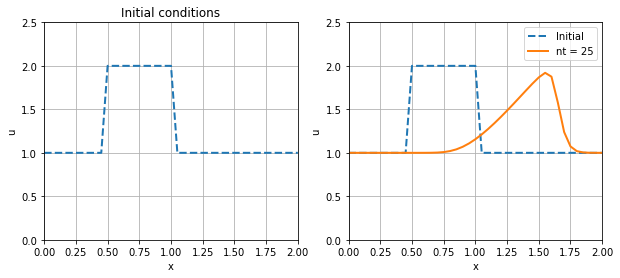

In [79]:
# Set parameters.
nx = 41  # number of spatial discrete points, initial is 41. try changing it and see the response
L = 2.0  # length of the 1D domain
dx = L / (nx - 1)  # spatial grid size
nt = 25  # number of time steps
dt = 0.02  # time-step size
c = 1.0  # convection speed

# Define the grid point coordinates.
x = numpy.linspace(0.0, L, num=nx)

# Set initial conditions with 1.0 everywhere (for now).
u0 = numpy.ones(nx)

# Get a list of indices where 0.5 <= x <= 1.0.
mask = numpy.where(numpy.logical_and(x >= 0.5, x <= 1.0))

# Set initial condition u = 2.0 where 0.5 <= x <= 1.0.
u0[mask] = 2.0

# Compute the solution using Euler's method (vectorized).
u = u0.copy()
for n in range(1, nt):
    u[1:] = u[1:] - dt / dx * u[1:] * (u[1:] - u[:-1])

# Plot initial condition and result.
pyplot.figure(figsize=(10, 4))

pyplot.subplot(1,2,1)
pyplot.title('Initial conditions')
pyplot.xlabel('x')
pyplot.ylabel('u')
pyplot.grid()
pyplot.plot(x, u0, color='C0', linestyle='--', linewidth=2)
pyplot.xlim(0.0, L)
pyplot.ylim(0.0, 2.5);

pyplot.subplot(1,2,2)
pyplot.xlabel('x')
pyplot.ylabel('u')
pyplot.grid()
pyplot.plot(x, u0, label='Initial',
            color='C0', linestyle='--', linewidth=2)
pyplot.plot(x, u, label='nt = {}'.format(nt),
            color='C1', linestyle='-', linewidth=2)
pyplot.legend()
pyplot.xlim(0.0, L)
pyplot.ylim(0.0, 2.5);

pyplot.show()    

Observation: While in the previous linear advection PDE we can increase `nx` up to 101 before the result explodes, in this non-linear advection PDE, it seems we can't increase no more than 51 before it explodes. Interesting to see the transition at `48<nx<51`, where the shape starts to change and exactly at `nx=51`, it explodes. 

As Prof L. Barba said, the shape of the wave is non-symmetrical, "lagging at behind, steepening at front", and it's physics. 

## CFL of convection PDE

Making the above linear convection PDE into a function

In [84]:
def linear_convection(nx, L=2.0, c=1.0, dt=0.025, nt=20):
    """
    Solves the 1D linear convection equation
    with constant speed c in the domain [0, L]
    and plots the solution (along with the initial conditions).

    Parameters
    ----------
    nx : integer
        Number of grid points to discretize the domain.
    L : float, optional
        Length of the domain; default: 2.0.
    c : float, optional
        Convection speed; default: 1.0.
    dt : float, optional
        Time-step size; default: 0.025.
    nt : integer, optional
        Number of time steps to compute; default: 20.
    """
    # Discretize spatial grid.
    dx = L / (nx - 1)
    x = numpy.linspace(0.0, L, num=nx)
    # Set initial conditions.
    u0 = numpy.ones(nx)
    mask = numpy.where(numpy.logical_and(x >= 0.5, x <= 1.0))
    u0[mask] = 2.0
    # Integrate the solution in time.
    u = u0.copy()
    for n in range(1, nt):
        u[1:] = u[1:] - c * dt / dx * (u[1:] - u[:-1])
    # Plot the solution along with the initial conditions.
    pyplot.figure(figsize=(4.0, 4.0))
    pyplot.xlabel('x')
    pyplot.ylabel('u')
    pyplot.grid()
    pyplot.plot(x, u0, label='Initial',
                color='C0', linestyle='--', linewidth=2)
    pyplot.plot(x, u, label='nt = {}'.format(nt),
                color='C1', linestyle='-', linewidth=2)
    pyplot.legend()
    pyplot.xlim(0.0, L)
    pyplot.ylim(0.0, 2.5);

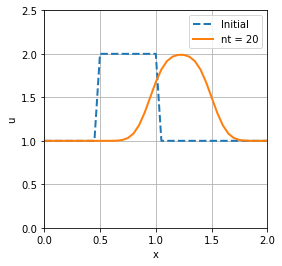

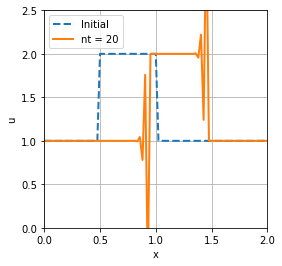

In [85]:
linear_convection(41)
linear_convection(85)

Apply CFL

For the forward-time/backward-space scheme:

$$\sigma=\frac{c \Delta t}{\Delta x} \leq 1$$

In other words, $\Delta x$ must always be larger than $c\Delta t$

Modifying the above function to include CFL, `sigma`. Now, no matter how many point `nx` we use, it's always stable, because the `dt` adapts by itself from the `sigma`.

In [89]:
def linear_convection_cfl(nx, L=2, c=1, sigma=0.5, nt=25):
    dx = L / (nx - 1) 
    x = numpy.linspace(0.0, L, num=nx)
    
    # calculate dt from CFL given
    dt = sigma * dx / c
    
    # Set initial conditions.
    u0 = numpy.ones(nx)
    mask = numpy.where(numpy.logical_and(x >= 0.5, x <= 1.0))
    u0[mask] = 2.0
    # Integrate the solution in time.
    u = u0.copy()
    for n in range(1, nt):
        u[1:] = u[1:] - c * dt / dx * (u[1:] - u[:-1])
    # Plot the solution along with the initial conditions.
    pyplot.figure(figsize=(4.0, 4.0))
    pyplot.xlabel('x')
    pyplot.ylabel('u')
    pyplot.grid()
    pyplot.plot(x, u0, label='Initial',
                color='C0', linestyle='--', linewidth=2)
    pyplot.plot(x, u, label='nt = {}'.format(nt),
                color='C1', linestyle='-', linewidth=2)
    pyplot.legend()
    pyplot.xlim(0.0, L)
    pyplot.ylim(0.0, 2.5);    

Will look fine after CFL. Default is set 0.5.

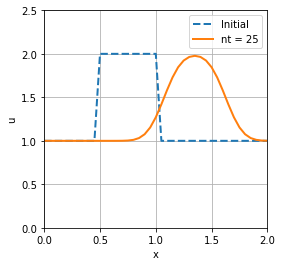

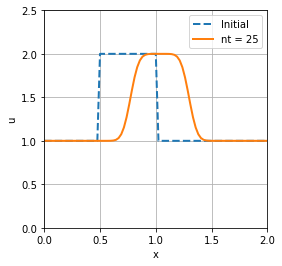

In [122]:
linear_convection_cfl(41)
linear_convection_cfl(85)

We then experiment by changing the CFL. Reducing the CFL to 0.2, and increase to the max 1.

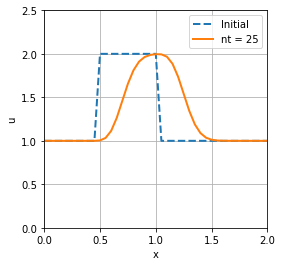

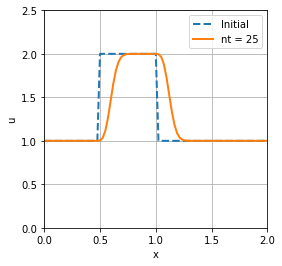

In [126]:
linear_convection_cfl(41, sigma=0.2)
linear_convection_cfl(85, sigma=0.2)

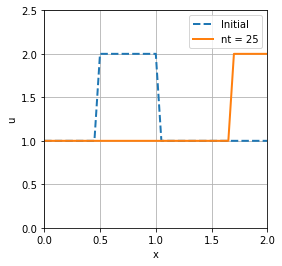

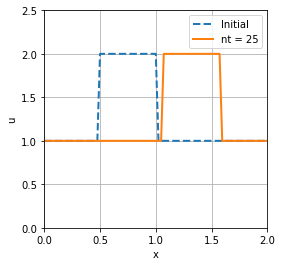

In [127]:
linear_convection_cfl(41, sigma=1)
linear_convection_cfl(85, sigma=1)

Observation: As CFL increases to 1, the result gets farther from the initial waveform, but the shape is more conserved (square-hat-shaped)

Now we change the length `L`.

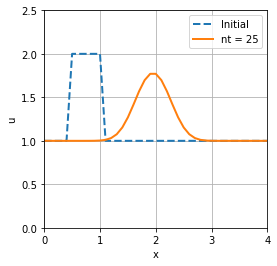

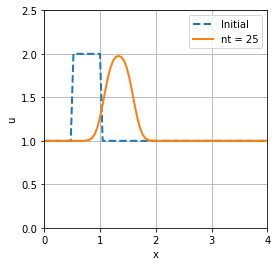

In [123]:
linear_convection_cfl(41, L=4)
linear_convection_cfl(85, L=4)

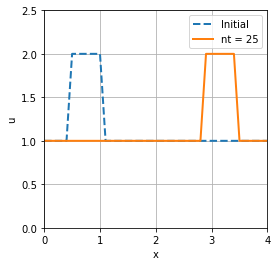

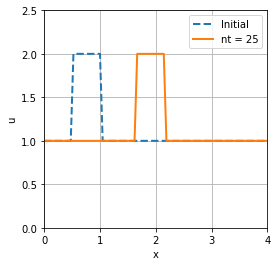

In [124]:
linear_convection_cfl(41, L=4, sigma=1)
linear_convection_cfl(85, L=4, sigma=1)

Observation: With CFL or `sigma=0.5` and lower nx (`nx=41`) doesn't preserve the amplitude (amplitude gets smaller). However, with CFL equals unity or `sigma=1`, whatever `nx`, the amplitude is still preserved. 

Conclusion: It's better to have higher number of grids `nx` and higher CFL `sigma` to produce more accurate, stable, and meaningful result. 

For non-linear convection PDE

In [94]:
def nonlinear_convection_cfl(nx, L=2, c=1, sigma=0.5, nt=25):
    dx = L / (nx - 1) 
    x = numpy.linspace(0.0, L, num=nx)
    
    # calculate dt from CFL given
    dt = sigma * dx / c
    
    # Set initial conditions.
    u0 = numpy.ones(nx)
    mask = numpy.where(numpy.logical_and(x >= 0.5, x <= 1.0))
    u0[mask] = 2.0
    # Integrate the solution in time.
    u = u0.copy()
    for n in range(1, nt):
        u[1:] = u[1:] - dt / dx * u[1:] * (u[1:] - u[:-1])
    # Plot the solution along with the initial conditions.
    pyplot.figure(figsize=(4.0, 4.0))
    pyplot.xlabel('x')
    pyplot.ylabel('u')
    pyplot.grid()
    pyplot.plot(x, u0, label='Initial',
                color='C0', linestyle='--', linewidth=2)
    pyplot.plot(x, u, label='nt = {}'.format(nt),
                color='C1', linestyle='-', linewidth=2)
    pyplot.legend()
    pyplot.xlim(0.0, L)
    pyplot.ylim(0.0, 2.5);   

Apply CFL

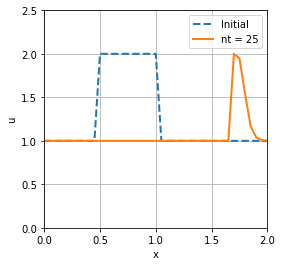

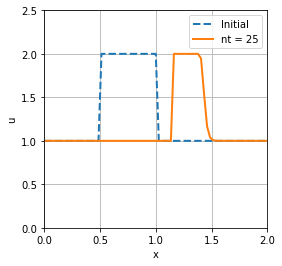

In [131]:
nonlinear_convection_cfl(41)
nonlinear_convection_cfl(75)

Observation: We don't get the shape of "lagging at behind, steepening at front" anymore now. It's interesting. Is it because of the CFL incorrect? Let's try reducing it or increasing it.

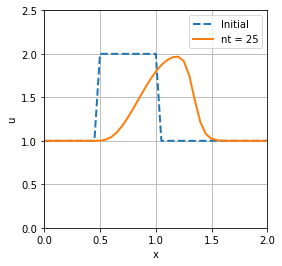

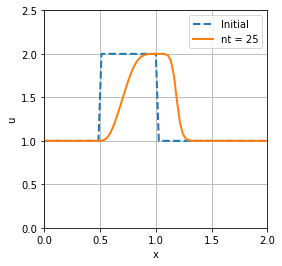

In [139]:
nonlinear_convection_cfl(41, sigma=0.2)
nonlinear_convection_cfl(75, sigma=0.2)

/home/jovyan/.local/lib/python3.7/site-packages/ipykernel_launcher.py:15: RuntimeWarning: overflow encountered in multiply
  from ipykernel import kernelapp as app
/home/jovyan/.local/lib/python3.7/site-packages/ipykernel_launcher.py:15: RuntimeWarning: invalid value encountered in subtract
  from ipykernel import kernelapp as app


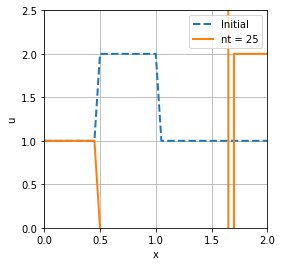

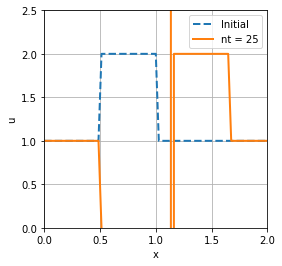

In [132]:
nonlinear_convection_cfl(41, sigma=1)
nonlinear_convection_cfl(75, sigma=1)

Observation: With CFL=0.2, we get the shape now. However, the simulation won't run with CFL=1, to be more precise `0.5<sigma<1`. So, CFL for non-linear advection must be below 0.5 (???) 

## Producing animation

In [140]:
from matplotlib import animation
from IPython.display import HTML

Modifying the `linear_convection_cfl` into `linear_convection_mov`
* Add `u_hist` to compile results from start `nt=0` to end `nt=nt`
* Delete the plotting scripts
* Return output of `x`, `u0` (initial condition), and `u_hist`

In [164]:
def linear_convection_mov(nx, L=2, c=1, sigma=0.5, nt=25):
    dx = L / (nx - 1) 
    x = numpy.linspace(0.0, L, num=nx)
    
    # calculate dt from CFL given
    dt = sigma * dx / c
    
    # Set initial conditions.
    u0 = numpy.ones(nx)
    mask = numpy.where(numpy.logical_and(x >= 0.5, x <= 1.0))
    u0[mask] = 2.0
    
    # Integrate the solution in time.
    u_hist = [u0.copy()]
    u = u0.copy()
    for n in range(1, nt):
        u[1:] = u[1:] - c * dt / dx * (u[1:] - u[:-1])
        u_hist.append(u.copy())        
    
    return x, u0, u_hist

Execute it, with 25 timesteps (`nt=25`).

In [184]:
x, u0, u_hist = linear_convection_mov(85, sigma=1, nt=25)

Make another function.

In [198]:
def update_plot(n, u_hist):
    """
    Update the line y-data of the Matplotlib figure.
    
    Parameters
    ----------
    n : integer
        The time-step index.
    u_hist : list of numpy.ndarray objects
        The history of the numerical solution.
    """
    fig.suptitle('Time step {:0>2}'.format(n))
    line.set_ydata(u_hist[n])

Create the initial plot and define it as `fig`.

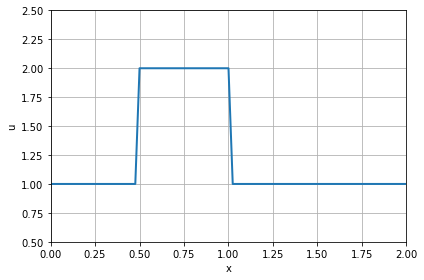

In [197]:
fig = pyplot.figure(figsize=(6.0, 4.0))
pyplot.xlabel('x')
pyplot.ylabel('u')
pyplot.grid()
line = pyplot.plot(x, u0,
                   color='C0', linestyle='-', linewidth=2)[0]
pyplot.xlim(0.0, L)
pyplot.ylim(0.5, 2.5)
fig.tight_layout()

Animate it. You can input any `frames`, as long as it's smaller than or equals to our timesteps `nt`, that is 25. 

In [199]:
# Create an animation.
nt = 25
anim = animation.FuncAnimation(fig, update_plot,
                               frames=nt, fargs=(u_hist,),
                               interval=500)

In [200]:
# Display the video.
HTML(anim.to_html5_video())